In [6]:
import numpy as np
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from matplotlib import pyplot as plt

In [7]:
B_mode=[]              # Normalized images aquired from RF data 
path1="/home/abhinav/Abhinav_multiFrequency_data/B_mode/"
for folder in sorted(os.listdir(path1)):
    for name in sorted(os.listdir(path1+folder)):
        data=cv2.imread(path1+folder+"/"+name)
        data=data[:,:,0]
        B_mode.append(data)
B_mode=np.array(B_mode) 
bmode=np.reshape(B_mode,np.prod(B_mode.shape))
B_mode.shape

(660, 156, 128)

In [8]:
Confidence_map=[]
pathc="/home/abhinav/Abhinav_multiFrequency_data/MF_Confidence_map/"
for folder in sorted(os.listdir(pathc)):
    for name in sorted(os.listdir(pathc+folder)):
        data=scipy.io.loadmat(pathc+folder+"/"+name)
        data=data["map"]
        Confidence_map.append(data)
Confidence_map=np.array(Confidence_map)
confidence=np.reshape(Confidence_map,np.prod(Confidence_map.shape))
Confidence_map.shape

(660, 156, 128)

In [9]:
Lable=[]
path_l= "/home/abhinav/Abhinav_multiFrequency_data/Grayscale_mask/"
for name in sorted(os.listdir(path_l)):
    c=1
    data=cv2.imread(path_l+name)
    data=data[:,:,0]
    while c<=11:
        Lable.append(data)
        c+=1
Lable=np.array(Lable)
lable=np.reshape(Lable,np.prod(Lable.shape))
Lable.shape


(660, 156, 128)

In [10]:
pathc="/home/abhinav/Abhinav_multiFrequency_data/MF_Confidence_map/"
for folder in sorted(os.listdir(pathc)):
    for name in sorted(os.listdir(pathc+folder)):
        print(name)

img_001_05_0.mat
img_001_05_5.mat
img_001_06_0.mat
img_001_06_5.mat
img_001_07_0.mat
img_001_07_5.mat
img_001_08_0.mat
img_001_08_5.mat
img_001_09_0.mat
img_001_09_5.mat
img_001_10_0.mat
img_002_05_0.mat
img_002_05_5.mat
img_002_06_0.mat
img_002_06_5.mat
img_002_07_0.mat
img_002_07_5.mat
img_002_08_0.mat
img_002_08_5.mat
img_002_09_0.mat
img_002_09_5.mat
img_002_10_0.mat
img_003_05_0.mat
img_003_05_5.mat
img_003_06_0.mat
img_003_06_5.mat
img_003_07_0.mat
img_003_07_5.mat
img_003_08_0.mat
img_003_08_5.mat
img_003_09_0.mat
img_003_09_5.mat
img_003_10_0.mat
img_004_05_0.mat
img_004_05_5.mat
img_004_06_0.mat
img_004_06_5.mat
img_004_07_0.mat
img_004_07_5.mat
img_004_08_0.mat
img_004_08_5.mat
img_004_09_0.mat
img_004_09_5.mat
img_004_10_0.mat
img_005_05_0.mat
img_005_05_5.mat
img_005_06_0.mat
img_005_06_5.mat
img_005_07_0.mat
img_005_07_5.mat
img_005_08_0.mat
img_005_08_5.mat
img_005_09_0.mat
img_005_09_5.mat
img_005_10_0.mat
img_006_05_0.mat
img_006_05_5.mat
img_006_06_0.mat
img_006_06_5.m

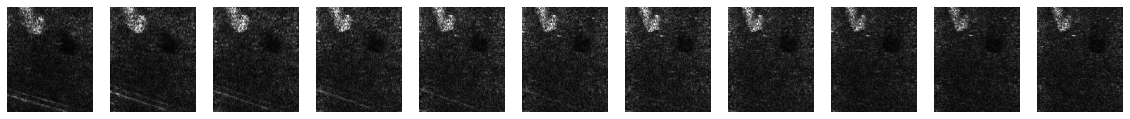

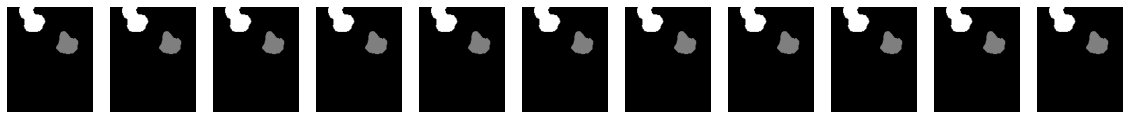

In [11]:
n=15
plt.figure(figsize=(20,20))
for i in range(11):
    x=n*11+i
    plt.subplot(2,11,i+1)
    plt.imshow(B_mode[x],cmap="gray")
    plt.axis('off')
plt.figure(figsize=(20,20))
for i in range(11):
    plt.subplot(2,11,11+i+1)
    plt.imshow(Lable[x],cmap='gray')
    plt.axis('off')

In [12]:
path="/home/abhinav/Abhinav_multiFrequency_data/RF_data/"
rfdata=[]
for folder in sorted(os.listdir(path)):                    ## directory for rf data
    for name in sorted(os.listdir(path+folder)):           ## directory for b_mode images
        RFdata=scipy.io.loadmat(path+folder+"/"+name)
        if "ImageData" in RFdata:
            RFdata=RFdata["ImageData"]             ## after folder 07 there is ImageData befor there was ImgData
        else:
            RFdata=RFdata["ImgData"]               ## the data is stored in the form of dictionary where "ImgData" is of our
            RFdata=RFdata[0,0]                     ## interest (before 07 folder there was 3 channls)
        RFdata=cv2.resize(RFdata,(128,256),interpolation=cv2.INTER_NEAREST)   ## resizing data wrt 5Mhz freq data
        RFdata=RFdata[80:236,:]                   # 156 samples
        rfdata.append(RFdata)
rfdata=np.array(rfdata)

In [13]:
rfdata.shape

(660, 156, 128)

In [14]:
si=156*128
N=np.zeros((si*660,56))
for p,RFdata in enumerate(rfdata):
    q=0
    x2=np.multiply(RFdata,RFdata)
    x4=np.multiply(x2,x2)
    for k in range(3,31):
        kernel=np.ones((k,3))*(1/(k*3))
        omega=ndimage.convolve(x2,kernel,mode="constant",cval=0)
        
        nume = np.multiply(omega,omega)
        deno = ndimage.convolve(x4,kernel,mode='constant',cval=0) - nume
        m=np.divide(nume,deno)
        
        N[p*si:p*si+si,q],N[p*si:p*si+si,q+1]=m.flatten(),omega.flatten()
        q+=2

In [15]:
df = pd.DataFrame(N)
df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.399594,1.252816e+09,0.404287,1.124513e+09,0.299234,8.996101e+08,0.347263,1.159281e+09,0.283585,9.936693e+08,...,0.278602,1.419663e+09,0.265544,1.367083e+09,0.283646,1.401151e+09,0.271212,1.352836e+09,0.290204,1.397992e+09
1,0.819115,1.698318e+09,0.977825,1.652968e+09,0.654302,1.322375e+09,0.687710,1.566898e+09,0.536734,1.343055e+09,...,0.466294,2.065813e+09,0.441400,1.989302e+09,0.424843,2.207982e+09,0.404270,2.131845e+09,0.435278,2.278409e+09
2,0.598243,9.003948e+08,1.090876,1.164948e+09,0.716400,9.319582e+08,0.670311,1.324878e+09,0.524342,1.135609e+09,...,0.405905,2.069096e+09,0.385082,1.992463e+09,0.389257,2.238355e+09,0.370856,2.161170e+09,0.401454,2.303954e+09
3,0.647674,1.604984e+09,1.032335,1.885006e+09,0.684534,1.508005e+09,0.874935,1.588333e+09,0.666623,1.361428e+09,...,0.382234,1.892324e+09,0.362939,1.822238e+09,0.359755,2.183460e+09,0.343093,2.108168e+09,0.376084,2.300601e+09
4,0.789124,2.501812e+09,0.933001,2.440728e+09,0.629025,1.952582e+09,0.693149,1.910585e+09,0.540597,1.637644e+09,...,0.340052,2.294501e+09,0.323385,2.209519e+09,0.359581,2.410971e+09,0.342930,2.327834e+09,0.365619,2.407155e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178875,0.905124,1.954804e+09,0.553579,1.466103e+09,0.869918,1.947544e+09,0.633136,1.622953e+09,0.546679,2.721373e+09,...,0.340184,1.534361e+09,0.357927,1.545317e+09,0.340788,1.490127e+09,0.342431,1.471445e+09,0.327281,1.422397e+09
13178876,1.092697,2.092569e+09,0.643685,1.569427e+09,0.940111,2.357443e+09,0.677303,1.964536e+09,0.632449,3.000619e+09,...,0.328909,1.634961e+09,0.351588,1.667596e+09,0.334827,1.608039e+09,0.328023,1.568562e+09,0.313659,1.516277e+09
13178877,0.825713,2.163961e+09,0.513321,1.622971e+09,0.809546,2.338973e+09,0.594420,1.949145e+09,0.616896,2.468374e+09,...,0.297915,1.330802e+09,0.329250,1.386847e+09,0.313801,1.337317e+09,0.309850,1.308536e+09,0.296460,1.264919e+09
13178878,0.632162,1.746190e+09,0.409417,1.309642e+09,0.675476,1.987385e+09,0.505938,1.656154e+09,0.680642,1.814237e+09,...,0.305573,1.155514e+09,0.328980,1.196187e+09,0.313547,1.153466e+09,0.309266,1.128219e+09,0.295906,1.090612e+09


In [16]:
name_columns=[]
c=1
for i in range(56):
    if i%2==0:
        name_columns.append(f"m{c}")
    else:
        name_columns.append(f"\u03A9{c}")                   # \u03A9 = Ω
        c+=1

In [17]:
df.columns=name_columns
df['c']=confidence
df['label']=lable

In [18]:
df

,m1,Ω1,m2,Ω2,m3,Ω3,m4,Ω4,m5,Ω5,...,m25,Ω25,m26,Ω26,m27,Ω27,m28,Ω28,c,label
0,0.399594,1.252816e+09,0.404287,1.124513e+09,0.299234,8.996101e+08,0.347263,1.159281e+09,0.283585,9.936693e+08,...,0.265544,1.367083e+09,0.283646,1.401151e+09,0.271212,1.352836e+09,0.290204,1.397992e+09,1.0,0
1,0.819115,1.698318e+09,0.977825,1.652968e+09,0.654302,1.322375e+09,0.687710,1.566898e+09,0.536734,1.343055e+09,...,0.441400,1.989302e+09,0.424843,2.207982e+09,0.404270,2.131845e+09,0.435278,2.278409e+09,1.0,0
2,0.598243,9.003948e+08,1.090876,1.164948e+09,0.716400,9.319582e+08,0.670311,1.324878e+09,0.524342,1.135609e+09,...,0.385082,1.992463e+09,0.389257,2.238355e+09,0.370856,2.161170e+09,0.401454,2.303954e+09,1.0,0
3,0.647674,1.604984e+09,1.032335,1.885006e+09,0.684534,1.508005e+09,0.874935,1.588333e+09,0.666623,1.361428e+09,...,0.362939,1.822238e+09,0.359755,2.183460e+09,0.343093,2.108168e+09,0.376084,2.300601e+09,1.0,0
4,0.789124,2.501812e+09,0.933001,2.440728e+09,0.629025,1.952582e+09,0.693149,1.910585e+09,0.540597,1.637644e+09,...,0.323385,2.209519e+09,0.359581,2.410971e+09,0.342930,2.327834e+09,0.365619,2.407155e+09,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178875,0.905124,1.954804e+09,0.553579,1.466103e+09,0.869918,1.947544e+09,0.633136,1.622953e+09,0.546679,2.721373e+09,...,0.357927,1.545317e+09,0.340788,1.490127e+09,0.342431,1.471445e+09,0.327281,1.422397e+09,0.0,0
13178876,1.092697,2.092569e+09,0.643685,1.569427e+09,0.940111,2.357443e+09,0.677303,1.964536e+09,0.632449,3.000619e+09,...,0.351588,1.667596e+09,0.334827,1.608039e+09,0.328023,1.568562e+09,0.313659,1.516277e+09,0.0,0
13178877,0.825713,2.163961e+09,0.513321,1.622971e+09,0.809546,2.338973e+09,0.594420,1.949145e+09,0.616896,2.468374e+09,...,0.329250,1.386847e+09,0.313801,1.337317e+09,0.309850,1.308536e+09,0.296460,1.264919e+09,0.0,0
13178878,0.632162,1.746190e+09,0.409417,1.309642e+09,0.675476,1.987385e+09,0.505938,1.656154e+09,0.680642,1.814237e+09,...,0.328980,1.196187e+09,0.313547,1.153466e+09,0.309266,1.128219e+09,0.295906,1.090612e+09,0.0,0


In [19]:
# df.to_csv("/home/abhinav/Abhinav_multiFrequency_data/MF_DataFrame.csv")

In [20]:
si=156*128
Dctr=pd.DataFrame()
n=0
for f in range(60):
    if n==11:
        n=0

    Dctr=pd.concat([Dctr,df.iloc[(f*11+n)*si:(f*11+n+1)*si,:]])
    n+=1

In [21]:
len(Dctr.index.unique())

1198080

In [22]:
Dctr

,m1,Ω1,m2,Ω2,m3,Ω3,m4,Ω4,m5,Ω5,...,m25,Ω25,m26,Ω26,m27,Ω27,m28,Ω28,c,label
0,0.399594,1.252816e+09,0.404287,1.124513e+09,0.299234,8.996101e+08,0.347263,1.159281e+09,0.283585,9.936693e+08,...,0.265544,1.367083e+09,0.283646,1.401151e+09,0.271212,1.352836e+09,0.290204,1.397992e+09,1.0,0
1,0.819115,1.698318e+09,0.977825,1.652968e+09,0.654302,1.322375e+09,0.687710,1.566898e+09,0.536734,1.343055e+09,...,0.441400,1.989302e+09,0.424843,2.207982e+09,0.404270,2.131845e+09,0.435278,2.278409e+09,1.0,0
2,0.598243,9.003948e+08,1.090876,1.164948e+09,0.716400,9.319582e+08,0.670311,1.324878e+09,0.524342,1.135609e+09,...,0.385082,1.992463e+09,0.389257,2.238355e+09,0.370856,2.161170e+09,0.401454,2.303954e+09,1.0,0
3,0.647674,1.604984e+09,1.032335,1.885006e+09,0.684534,1.508005e+09,0.874935,1.588333e+09,0.666623,1.361428e+09,...,0.362939,1.822238e+09,0.359755,2.183460e+09,0.343093,2.108168e+09,0.376084,2.300601e+09,1.0,0
4,0.789124,2.501812e+09,0.933001,2.440728e+09,0.629025,1.952582e+09,0.693149,1.910585e+09,0.540597,1.637644e+09,...,0.323385,2.209519e+09,0.359581,2.410971e+09,0.342930,2.327834e+09,0.365619,2.407155e+09,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13059067,0.884698,1.376998e+09,0.543349,1.032748e+09,0.342462,5.673604e+09,0.269976,4.728003e+09,0.423278,6.992349e+09,...,0.265280,3.528959e+09,0.253405,3.402925e+09,0.248515,3.320787e+09,0.238258,3.210094e+09,0.0,0
13059068,1.000769,1.641630e+09,0.600369,1.231223e+09,0.368399,5.906790e+09,0.289240,4.922325e+09,0.485775,7.628876e+09,...,0.263213,3.587848e+09,0.251449,3.459711e+09,0.255262,3.431331e+09,0.244671,3.316953e+09,0.0,0
13059069,0.783513,1.635921e+09,0.491383,1.226941e+09,0.327666,4.118936e+09,0.258915,3.432446e+09,0.415857,5.285082e+09,...,0.283125,2.935915e+09,0.270281,2.831061e+09,0.285460,2.861515e+09,0.273344,2.766131e+09,0.0,0
13059070,0.672308,1.366928e+09,0.431676,1.025196e+09,0.348772,2.697344e+09,0.274677,2.247787e+09,0.424978,3.355137e+09,...,0.329774,2.327164e+09,0.314294,2.244051e+09,0.347587,2.375821e+09,0.332153,2.296627e+09,0.0,0


In [23]:
Dcts=df.drop(Dctr.index)
Dcts

,m1,Ω1,m2,Ω2,m3,Ω3,m4,Ω4,m5,Ω5,...,m25,Ω25,m26,Ω26,m27,Ω27,m28,Ω28,c,label
19968,0.404796,3.785947e+08,0.515413,5.286881e+08,0.373798,4.229505e+08,0.266248,1.063275e+09,0.219850,9.113790e+08,...,0.220786,1.049720e+09,0.169087,1.293312e+09,0.162310,1.248715e+09,0.158524,1.566373e+09,1.0,0
19969,0.710627,4.960776e+08,0.991712,6.911627e+08,0.662056,5.529302e+08,0.438967,1.385155e+09,0.354055,1.187276e+09,...,0.356078,1.964159e+09,0.312949,2.175576e+09,0.298932,2.100556e+09,0.299267,2.444207e+09,1.0,0
19970,0.535130,7.504076e+08,0.648538,7.234960e+08,0.459261,5.787968e+08,0.573832,1.111764e+09,0.454590,9.529406e+08,...,0.389312,2.420755e+09,0.368003,2.647393e+09,0.350861,2.556104e+09,0.344303,2.817428e+09,1.0,0
19971,0.537013,7.515058e+08,0.726563,7.856405e+08,0.507504,6.285124e+08,0.543596,1.224514e+09,0.432364,1.049584e+09,...,0.392245,2.458903e+09,0.410466,2.487496e+09,0.390781,2.401721e+09,0.401247,2.403549e+09,1.0,0
19972,0.680705,8.289124e+08,0.929087,8.794959e+08,0.626799,7.035967e+08,0.577431,1.156461e+09,0.457224,9.912520e+08,...,0.402161,2.377350e+09,0.439436,2.555975e+09,0.417949,2.467838e+09,0.423091,2.447014e+09,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178875,0.905124,1.954804e+09,0.553579,1.466103e+09,0.869918,1.947544e+09,0.633136,1.622953e+09,0.546679,2.721373e+09,...,0.357927,1.545317e+09,0.340788,1.490127e+09,0.342431,1.471445e+09,0.327281,1.422397e+09,0.0,0
13178876,1.092697,2.092569e+09,0.643685,1.569427e+09,0.940111,2.357443e+09,0.677303,1.964536e+09,0.632449,3.000619e+09,...,0.351588,1.667596e+09,0.334827,1.608039e+09,0.328023,1.568562e+09,0.313659,1.516277e+09,0.0,0
13178877,0.825713,2.163961e+09,0.513321,1.622971e+09,0.809546,2.338973e+09,0.594420,1.949145e+09,0.616896,2.468374e+09,...,0.329250,1.386847e+09,0.313801,1.337317e+09,0.309850,1.308536e+09,0.296460,1.264919e+09,0.0,0
13178878,0.632162,1.746190e+09,0.409417,1.309642e+09,0.675476,1.987385e+09,0.505938,1.656154e+09,0.680642,1.814237e+09,...,0.328980,1.196187e+09,0.313547,1.153466e+09,0.309266,1.128219e+09,0.295906,1.090612e+09,0.0,0


In [24]:
test_ind=Dcts.index

In [25]:
xtsc,ytsc=Dcts.iloc[:,:-1],Dcts.iloc[:,-1]
xtrc,ytrc=Dctr.iloc[:,:-1],Dctr.iloc[:,-1]

In [26]:
from sklearn import tree
def Node_count(classifier):      # calculating number of nodes and depth per tree in forest
    node=[]                    
    depth=[]
    for i in range(len(classifier.estimators_)):  # classifier.estimators_= n_estimators =50
        N=classifier.estimators_[i].tree_.node_count
        D=classifier.estimators_[i].tree_.max_depth
        node.append(N)
        depth.append(D)
    return node,depth

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
modelc=RandomForestClassifier(n_estimators=50, criterion='gini',
                              max_depth=None, min_samples_leaf=50, max_features='sqrt', verbose=1, n_jobs=-1)
modelc.fit(xtrc,ytrc)                  # training
Nc,Dc=Node_count(modelc)
ypsc=modelc.predict(xtsc)
accuracy_score(ytsc,ypsc) * 100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:   23.9s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   39.0s finished
[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   6 out of  50 | elapsed:    4.2s remaining:   31.0s
[Parallel(n_jobs=48)]: Done  50 out of  50 | elapsed:    7.1s finished


94.93973691239316

In [28]:
R0,R1,R2=0,0,0
c0,c1,c2=0,0,0
ytsc=list(ytsc)
for index in range(len(ytsc)):
    if ytsc[index]==0:
        R0+=1
        if ypsc[index]==0:
            c0+=1
    elif ytsc[index]==127:
        R1+=1
        if ypsc[index]==127:
            c1+=1
    elif ytsc[index]==255:
        R2+=1
        if ypsc[index]==255:
            c2+=1

In [29]:
print(c0/R0,c1/R1,c2/R2)

0.984913066595381 0.7423543118978617 0.7582883950995015


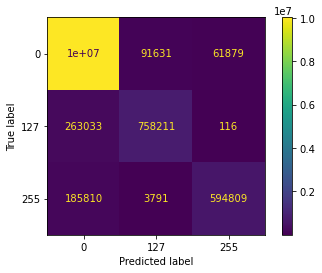

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cmc=confusion_matrix(ytsc,ypsc,labels=[0,127,255])
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=[0,127,255])
disp.plot()

In [31]:
def visualize_nodes_depth(Node,Depth):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.hist(Node,color='blue')
    plt.ylabel("Number of trees")
    plt.xlabel("Number of nodes")
    plt.title("Distribution of nodes per tree")

    plt.subplot(122)
    plt.hist(Depth,color='green')
    plt.ylabel("Number of trees")
    plt.xlabel("Depth of tree")
    plt.title("Distribution of depth of tree")
    plt.suptitle(f"Distribution of Nodes and Tress for LWLPO",fontsize=16)
    plt.show()

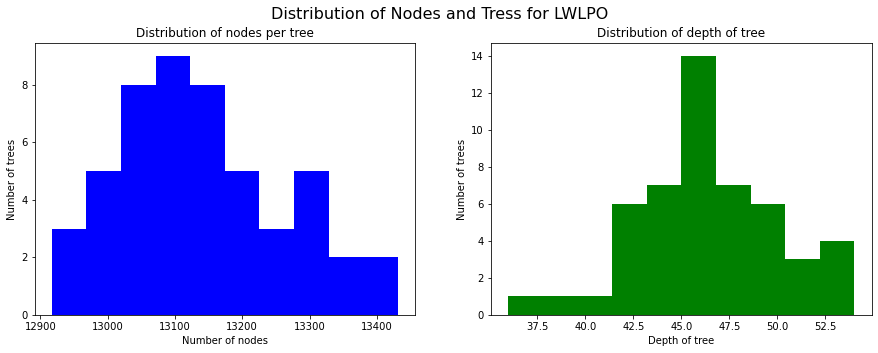

In [32]:
visualize_nodes_depth(Nc, Dc)

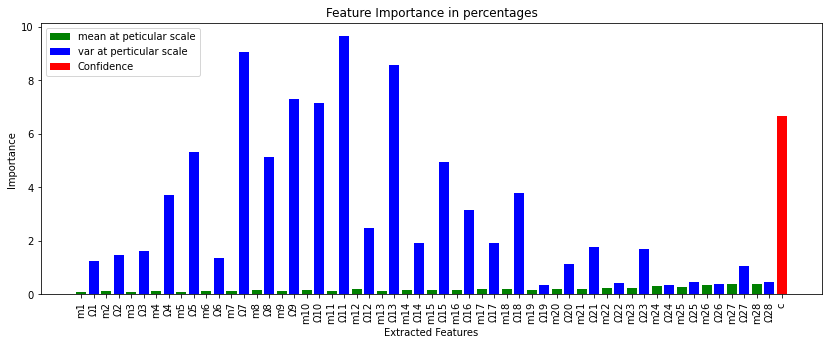

In [33]:
imp=[x*100 for x in modelc.feature_importances_]
n=len(imp)
plt.figure(figsize=(14,5))
pos1=[i for i in range(n-1) if i%2==0]
value1=[imp[i] for i in range(n-1) if i%2==0]
plt.bar(pos1,value1,color='green',label='mean at peticular scale')
pos2=[i for i in range(n-1) if i%2!=0]
value2=[imp[i] for i in range(n-1) if i%2!=0]
plt.bar(pos2,value2,color='blue',label="var at perticular scale")
plt.bar([56],imp[56],color='red',label="Confidence")
plt.xlabel("Extracted Features")
plt.ylabel("Importance")
plt.title("Feature Importance in percentages") 
pos=sorted(pos1+pos2)+[56]
plt.xticks(pos,df.columns[:-1],rotation='vertical')
plt.legend(loc="upper left")
plt.show()

In [34]:
pred_ind=lable[test_ind]
bmode_ind=bmode[test_ind]

In [35]:
Img=[]
true_lable=[]
pred_lable=[]
for i in range(600):
    Img.append(np.reshape(bmode_ind[i*si:si+i*si],(156,128)))
    true_lable.append(np.reshape(ytsc[i*si:si+i*si],(156,128)))
    pred_lable.append(np.reshape(ypsc[i*si:si+i*si],(156,128)))

In [36]:
len(true_lable)

600

[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 127 255] 3087
[  0 127 255] 3040
[  0 127 255] 3011
[  0 255] 2806
[  0 127 255] 2677
[  0 127 255] 2479
[  0 127 255] 2555
[  0 127 255] 2336
[  0 127 255] 1776
[  0 127 255] 2471


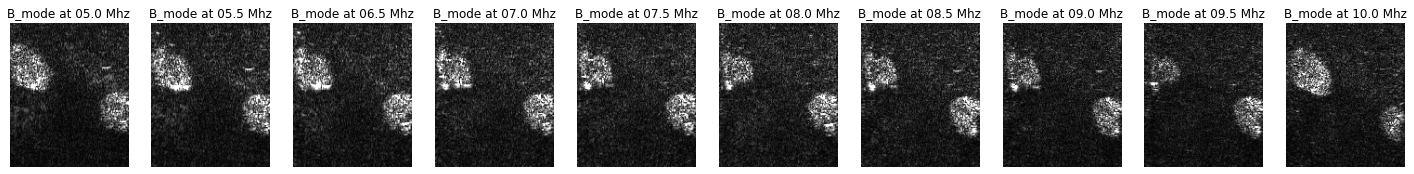

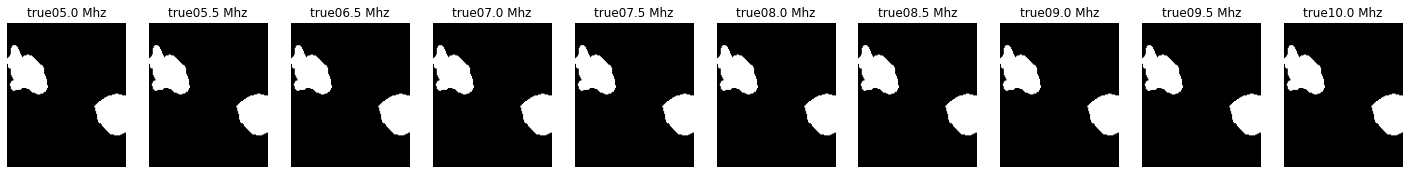

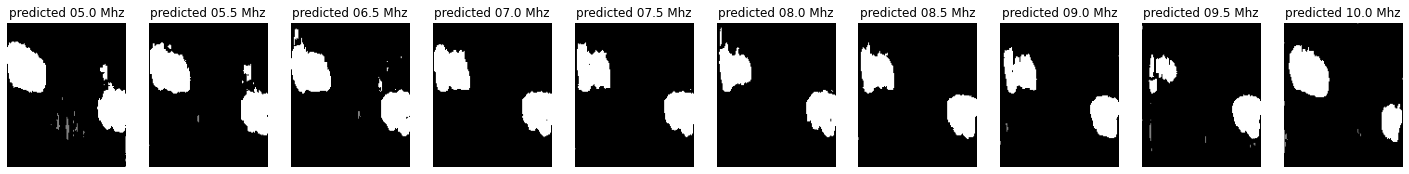

In [37]:
n=3
name=["05.0 Mhz","05.5 Mhz","06.0 Mhz","06.5 Mhz","07.0 Mhz","07.5 Mhz","08.0 Mhz","08.5 Mhz","09.0 Mhz","09.5 Mhz","10.0 Mhz"]
if n==0:
    ind=0
elif 1<=n<=10:
   
    ind=11%n
else:
    ind=n%11
name.remove(name[ind])
plt.figure(figsize=(25,30))
for i in range(10):
    x=n*10+i
    plt.subplot(1,10,i+1)
    plt.imshow(Img[x],cmap="gray")
    plt.title(f"B_mode at {name[i]}")
    plt.axis('off')
plt.figure(figsize=(25,30))
for i in range(10):
    x=n*10+i
    plt.subplot(1,10,i+1)
    print(np.unique(true_lable[x]))
    plt.imshow(true_lable[x],cmap='gray')
    plt.title(f"true{name[i]}")
    plt.axis('off')
plt.figure(figsize=(25,30))
for i in range(10):
    x=n*10+i
    plt.subplot(1,10,i+1)
    print(np.unique(pred_lable[x]), sum(sum(pred_lable[x]==255)))
    plt.imshow(pred_lable[x],cmap='gray')
    plt.title(f"predicted {name[i]}")
    plt.axis('off')

In [38]:
def param(i,p):    ## shape of output image
    OH=156
    OW=128
    si=156*128 
    m=Dcts.iloc[i*si:(i+1)*si,p].tolist()
    # low,high=min(m),max(m)
    m=np.reshape(m,(OH,OW))
    # m=(m-low)/(high-low)
    # m=m*255
#     m=(m-np.min(m))/(np.max(m)-np.min(m))
#     m=np.multiply(m,255)
    return m

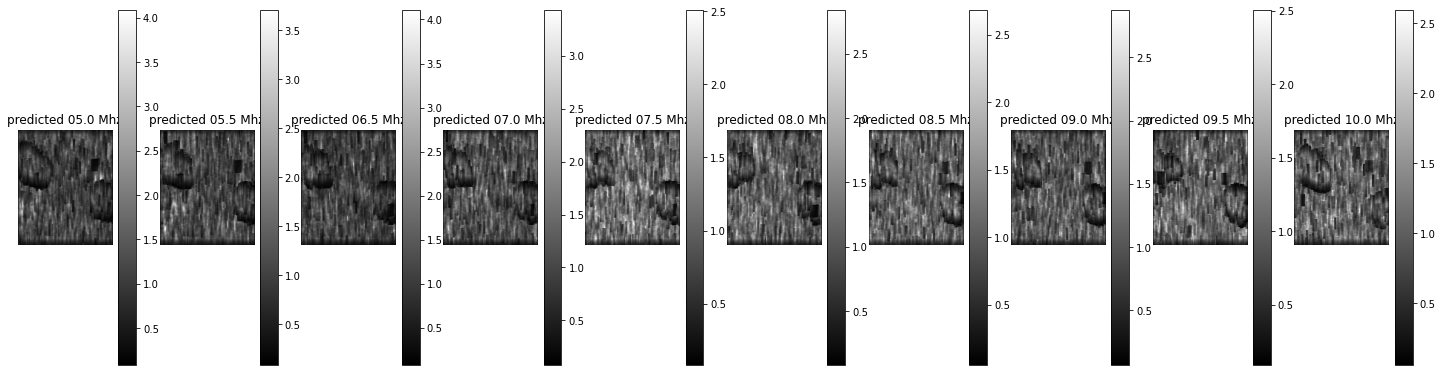

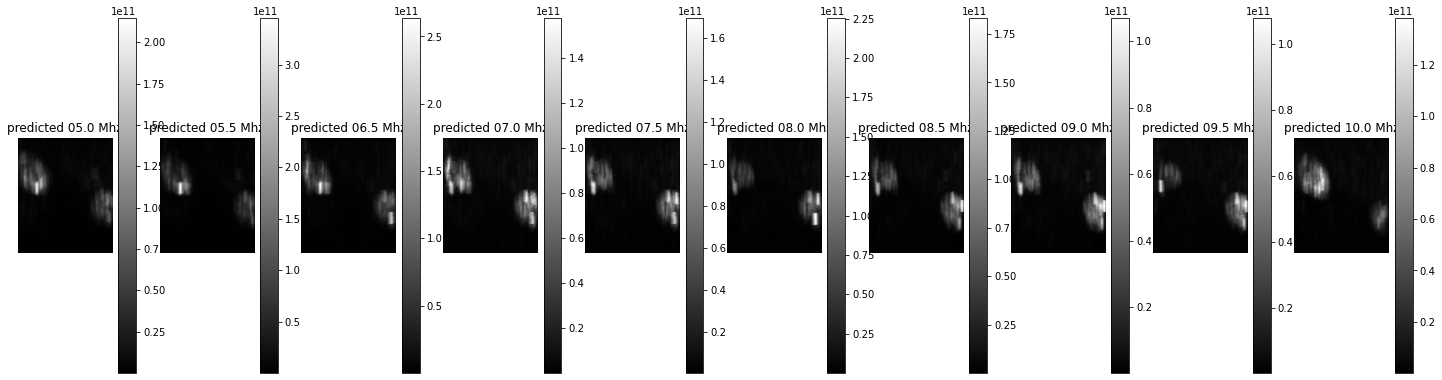

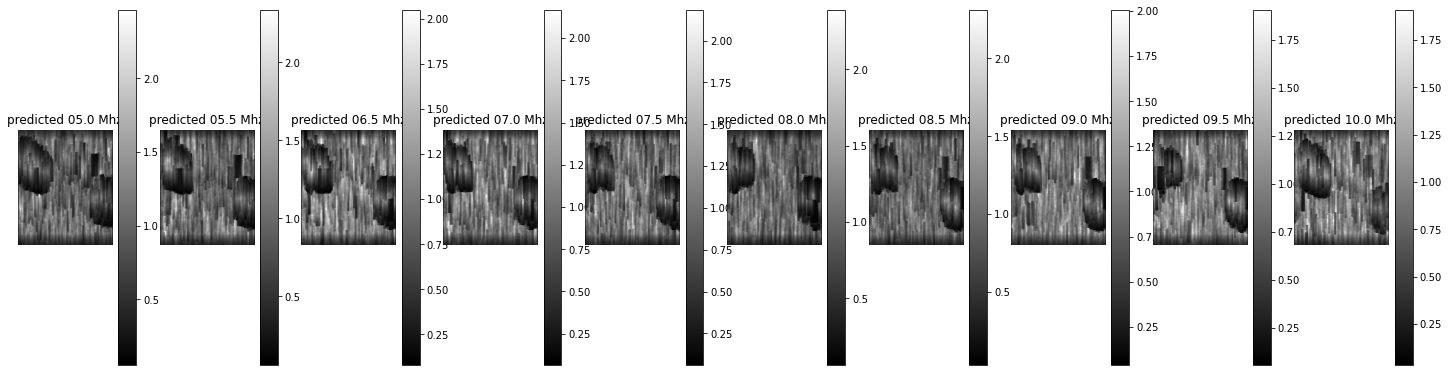

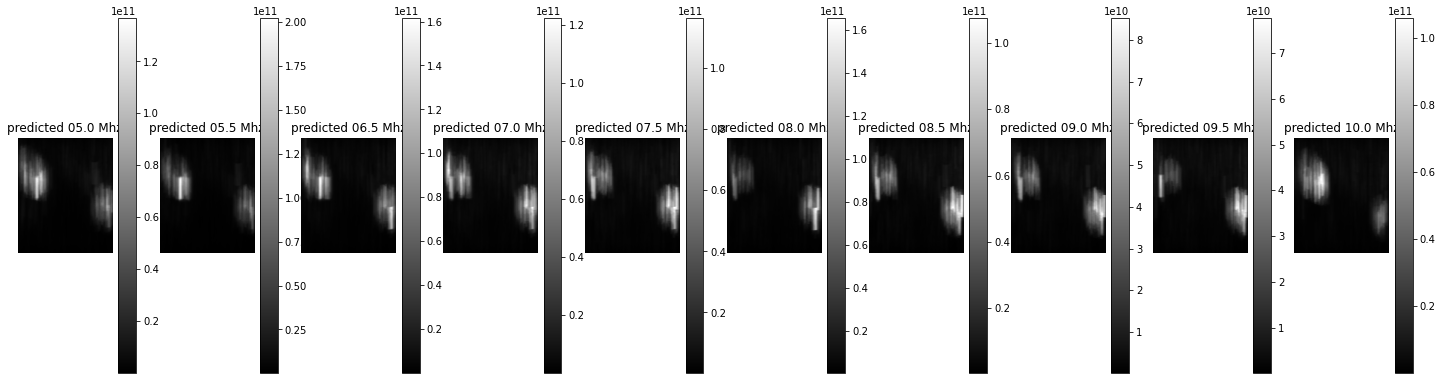

In [39]:
fig=plt.figure(figsize=(25,30))
# plt.suptitle("abhinav")
p=26
q=0
base=param(n*10+q+0,p)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(param(n*10+i,p),cmap='gray')
    plt.title(f"predicted {name[i]}")
    plt.colorbar()
    plt.axis("off")

fig=plt.figure(figsize=(25,30))
# plt.suptitle("abhinav")
p=27
base=param(n*10+q+0,p)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(param(n*10+q+i,p),cmap='gray')
    plt.title(f"predicted {name[i]}")
    plt.colorbar()
    plt.axis("off")

fig=plt.figure(figsize=(25,30))
# plt.suptitle("abhinav")
p=54
base=param(n*10+q+0,p)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(param(n*10+q+i,p),cmap='gray')
    plt.title(f"predicted {name[i]}")
    plt.colorbar()
    plt.axis("off")

fig=plt.figure(figsize=(25,30))
# plt.suptitle("abhinav")
p=55
base=param(n*10+q+0,p)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(param(n*10+q+i,p),cmap='gray')
    plt.title(f"predicted {name[i]}")
    plt.colorbar()
    plt.axis("off")
# plt.suptitle("abhinav")

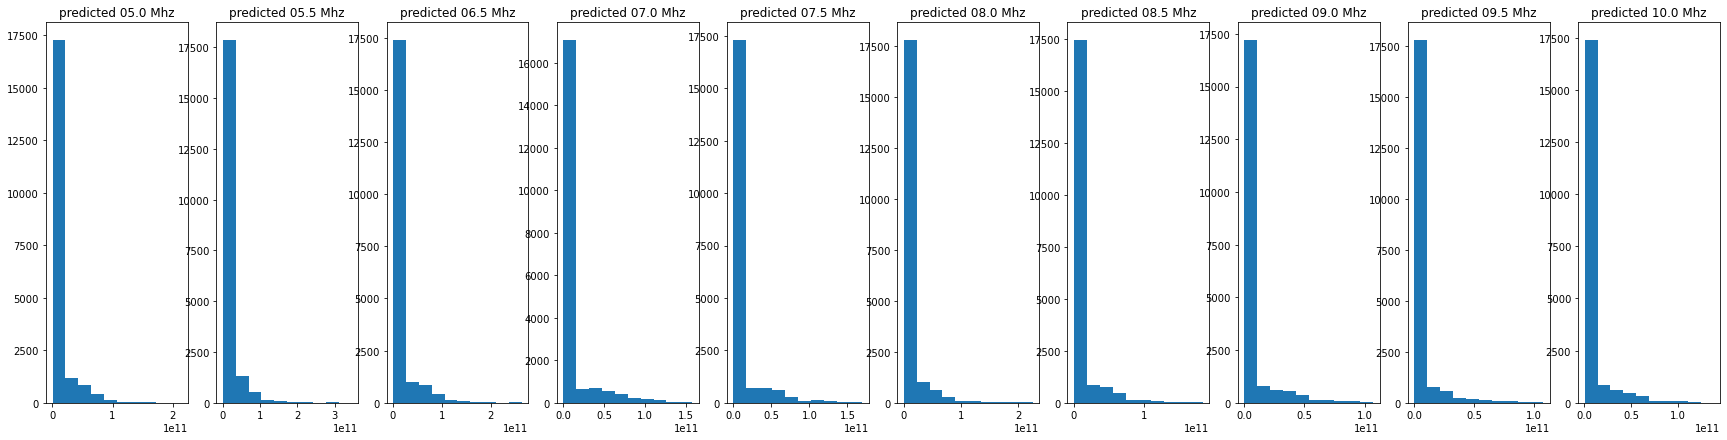

In [40]:
fig=plt.figure(figsize=(30,7))
# plt.suptitle("abhinav")
base=param(n*10+1,26)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.hist(param(n*10+i,27).reshape(-1))
    plt.title(f"predicted {name[i]}")
    # plt.axis("off")

0.0

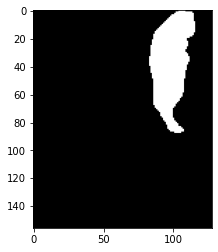

In [41]:
n=1
x=Lable[n]
y=np.zeros(x.shape)
y[x==127]=x[x==127]
plt.imshow(y,cmap="gray")
np.mean(x[x==127])
np.std(x[x==127])

In [78]:
np.array([rfdata[0][x==255],rfdata[10][x==255]]).T[0:100]

array([[  39890.06423671,   35032.12647225],
       [  10330.52923812,   55646.84169194],
       [ 104405.84152904,   22916.5994328 ],
       [ 176727.50750535,   50845.44610499],
       [ 131768.29348023,   26049.00350786],
       [  93379.67284413,   20224.90163035],
       [ 148664.71102935,   38957.27105761],
       [ 114294.74572238,  117355.14309849],
       [  37605.37202603,   61538.66553661],
       [ 263498.08396949,  150271.52748995],
       [ 369201.88501299,   97319.37016114],
       [ 273555.95627421,   42100.34126865],
       [ 243801.19303986,  155520.22393599],
       [ 271410.28306614,  104153.26659437],
       [ 141166.82399592,   73718.98764472],
       [  43185.58548344,   91796.22505268],
       [ 235841.43281505,   63679.46976225],
       [ 231229.99775563,   85911.95204854],
       [ 166206.95174557,   87114.81671279],
       [  69465.11598978,   61899.92884986],
       [  19705.36852779,  149152.41747441],
       [ 100422.03944123,   76679.66270488],
       [ 4

In [79]:
def omega(data):
    return sum(data*data)/len(data)

In [81]:
A=np.array(rfdata[10][x==255])
B=np.array(rfdata[0][x==255])
omega(A),omega(B)

(41858015438.50019, 32731628278.97921)

In [42]:
np.unique(Lable[1])

array([  0, 127, 255], dtype=uint8)

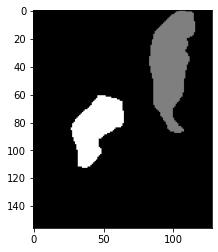

In [43]:
plt.imshow(Lable[1],cmap="gray")

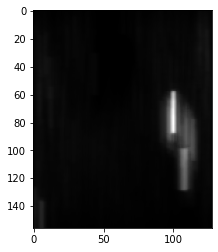

In [44]:
plt.imshow(param(n*10+q+i,p),cmap="gray")

In [45]:
def mean_var_region(n,p,map):
    mean_var=[]
    row_name=[]
    for i in range(10):
        omega=param(n*10+i,p)
        ind_0=map==0
        ind_127=map==127
        ind_255=map==255
        mean_0=np.mean(omega[ind_0])
        mean_127=np.mean(omega[ind_127])
        mean_255=np.mean(omega[ind_255])
        var_0=np.std(omega[ind_0])**2
        var_127=np.std(omega[ind_127])**2
        var_255=np.std(omega[ind_255])**2
        mean_var.append([mean_0,var_0,mean_127,var_127,mean_255,var_255])
        row_name.append(f"{name[i]}")
    mean_var=np.array(mean_var)
    return pd.DataFrame(mean_var, columns=["mean_0","var_0","mean_127","var_127","mean_255","var_255"],index=row_name)

In [46]:
omega=param(n*10+i,p)
ind_255=map==255
mean_=np.mean(omega[ind_255])
var_127=np.std(omega[ind_255])**2
# ind_127=map[map==127]
# mean_127=np.mean(omega[ind_127])
# var_127=np.std(omega[ind_127])**2
# ind_255=map[map==255]
# mean_255=np.mean(omega[ind_255])
# var_255=np.std(omega[ind_255])**2
# omega[ind_0].shape
var_127

/home/miriad1c/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/miriad1c/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/miriad1c/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/miriad1c/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/miriad1c/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

,mean_0,var_0,mean_127,var_127,mean_255,var_255
05.0 Mhz,2.726883e+09,6.389205e+18,7.945897e+08,4.288367e+17,NaN,NaN
05.5 Mhz,2.858271e+09,1.979153e+18,9.699173e+08,7.373812e+17,NaN,NaN
06.5 Mhz,3.200258e+09,2.284206e+18,1.142918e+09,1.234271e+18,NaN,NaN
07.0 Mhz,3.533180e+09,2.616278e+18,1.285402e+09,1.442794e+18,NaN,NaN
07.5 Mhz,3.653395e+09,2.841129e+18,1.194972e+09,1.502086e+18,NaN,NaN
08.0 Mhz,3.600588e+09,2.602946e+18,1.189406e+09,1.610214e+18,NaN,NaN
08.5 Mhz,3.611125e+09,2.823969e+18,1.073664e+09,1.921269e+18,NaN,NaN
09.0 Mhz,2.715714e+09,1.600026e+18,8.482796e+08,9.859518e+17,NaN,NaN
09.5 Mhz,2.554657e+09,1.469217e+18,7.906203e+08,1.106168e+18,NaN,NaN
10.0 Mhz,2.774257e+09,1.686559e+18,8.442526e+08,1.135616e+18,NaN,NaN


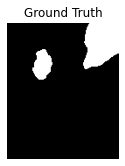

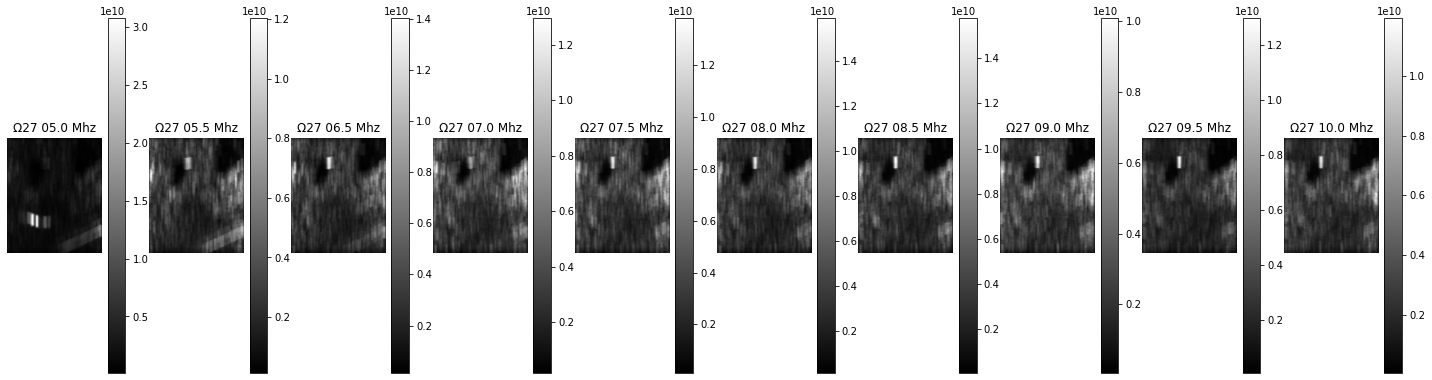

In [47]:
n=17
fig=plt.figure(figsize=(2.5,2.5))
map=true_lable[n*10]
plt.imshow(map,cmap='gray')
plt.title("Ground Truth")
plt.axis("off")

fig=plt.figure(figsize=(25,30))
p=27
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(param(n*10+i,p),cmap='gray')
    plt.title(f"\u03A9{p} {name[i]}")
    plt.colorbar()
    plt.axis("off")

# fig=plt.figure(figsize=(25,30))
# p=55
# for i in range(10):
#     plt.subplot(1,10,i+1)
#     plt.imshow(param(n*10+i,p),cmap='gray')
#     plt.title(f"\u03A9{p} {name[i]}")
#     # plt.colorbar()
#     plt.axis("off")

mean_var_region(n,p,map)

In [48]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
sum(sum(a>4))

5

In [49]:
zz=[]
zz.append([1,5,9,64])
zz.append([5,98,78,65])
zz

[[1, 5, 9, 64], [5, 98, 78, 65]]

In [50]:
zz=np.array(zz)
zz

array([[ 1,  5,  9, 64],
       [ 5, 98, 78, 65]])

In [51]:
np.std(zz[zz<=10])

2.8284271247461903